In [1]:
import pandas as pd

In [2]:
daily_transport = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526 (1).csv")

In [3]:
daily_transport.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,"16,436","10,705",225,"19,026","3,925",59
1,15/09/2023,"15,499","10,671",267,"18,421","4,519",61
2,28/12/2021,"1,756","2,352",0,"3,775",0,13
3,11/01/2023,"10,536","8,347",223,"14,072",0,48
4,11/09/2021,820,612,0,"1,283",0,11


In [7]:
daily_transport.isnull().values.any()

True

In [8]:
daily_transport.isnull().sum()

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [9]:
daily_transport['Other'] = daily_transport['Other'].fillna(0)

In [10]:
daily_transport.isnull().sum()

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

In [11]:
for col in daily_transport.columns[1:]:
    daily_transport[col] = daily_transport[col].astype(str).str.replace(",","").astype(int)
daily_transport.set_index('Date',inplace=True)
print(daily_transport.head())

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
30/08/2024        16436       10705           225        19026    3925     59
15/09/2023        15499       10671           267        18421    4519     61
28/12/2021         1756        2352             0         3775       0     13
11/01/2023        10536        8347           223        14072       0     48
11/09/2021          820         612             0         1283       0     11


In [16]:
daily_transport.index = pd.to_datetime(daily_transport.index, dayfirst=True)

In [17]:
daily_transport['weekday'] = daily_transport.index.day_name()

In [18]:
daily_transport

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,weekday
Date,,,,,,,
2024-08-30,16436,10705,225,19026,3925,59,Friday
2023-09-15,15499,10671,267,18421,4519,61,Friday
2021-12-28,1756,2352,0,3775,0,13,Tuesday
2023-01-11,10536,8347,223,14072,0,48,Wednesday
2021-09-11,820,612,0,1283,0,11,Saturday
...,...,...,...,...,...,...,...
2023-01-19,11337,8671,262,14881,0,66,Thursday
2023-08-16,16791,11800,387,20936,4684,113,Wednesday
2022-01-10,5732,3548,73,6644,0,25,Monday


In [19]:
averageByWeekday = daily_transport.groupby('weekday')[['Local Route','Light Rail']].mean()

In [20]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [21]:
averageByWeekday = averageByWeekday.reindex(weekday_order)

In [24]:
import matplotlib.pyplot as plt

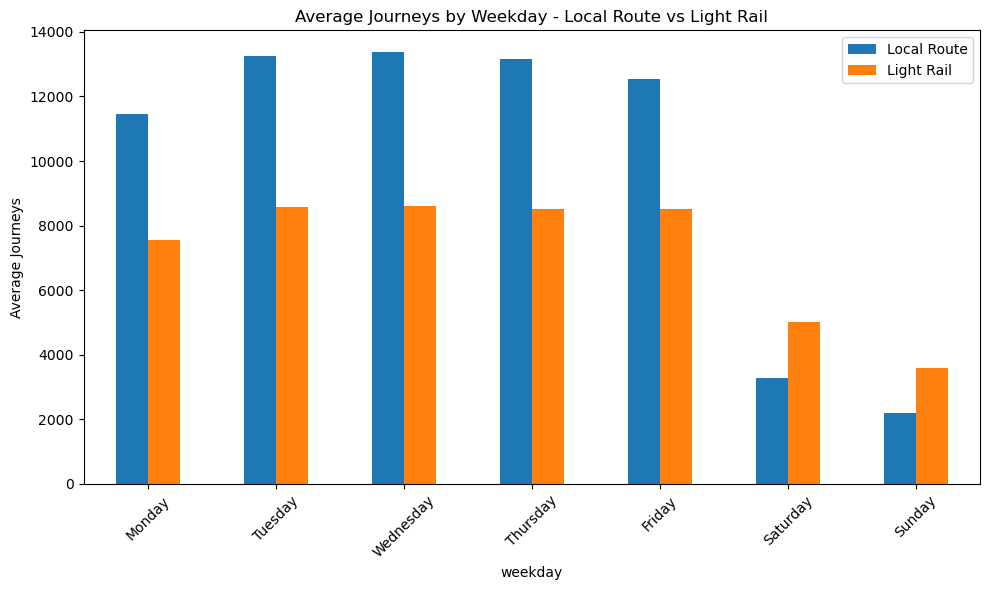

In [25]:
averageByWeekday.plot(kind='bar', figsize=(10,6))
plt.title("Average Journeys by Weekday - Local Route vs Light Rail")
plt.ylabel("Average Journeys")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
daily_transport['day'] = daily_transport.index.day

In [29]:
rapid_day_avg = daily_transport.groupby('day')['Rapid Route'].mean()

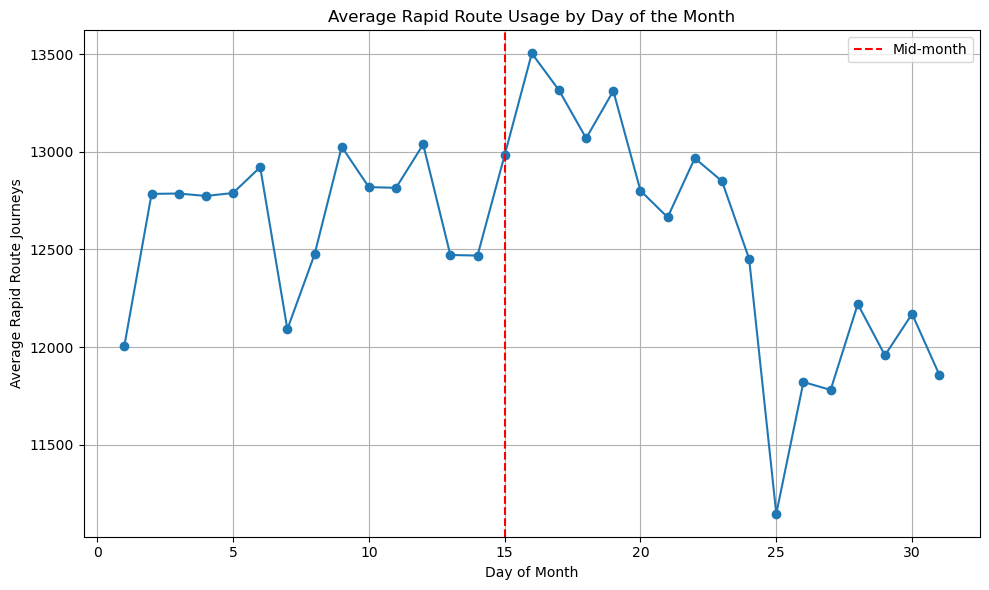

In [30]:
plt.figure(figsize=(10,6))
plt.plot(rapid_day_avg, marker='o')
plt.axvline(15, color='red', linestyle='--', label='Mid-month')
plt.title("Average Rapid Route Usage by Day of the Month")
plt.xlabel("Day of Month")
plt.ylabel("Average Rapid Route Journeys")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
print(daily_transport.groupby('weekday')['Local Route'].mean())

weekday
Friday       12543.755474
Monday       11444.678832
Saturday      3271.156934
Sunday        2191.868613
Thursday     13166.708029
Tuesday      13243.072993
Wednesday    13378.525547
Name: Local Route, dtype: float64


In [87]:
daily_transport['year'] = daily_transport.index.year

Day with highest total journeys: Wednesday
Most traveled mode on Wednesday: Rapid Route


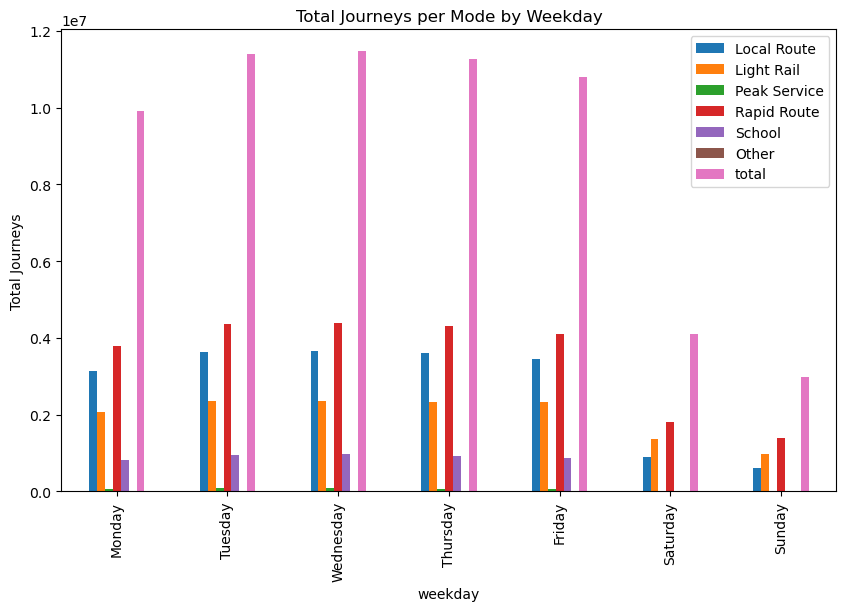

In [48]:
journeys_by_weekday =  daily_transport.groupby('weekday')[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
journeys_by_weekday = journeys_by_weekday.reindex(weekday_order)
# Total journeys per weekday (all modes)
journeys_by_weekday['total'] = journeys_by_weekday.sum(axis=1)
max_day = journeys_by_weekday['total'].idxmax()
print(f"Day with highest total journeys: {max_day}")
mode_max = journeys_by_weekday.loc[max_day].drop('total').idxmax()
print(f"Most traveled mode on {max_day}: {mode_max}")
journeys_by_weekday.plot(kind='bar', figsize=(10,6), title='Total Journeys per Mode by Weekday')
plt.ylabel('Total Journeys')
plt.show()


In [51]:

daily_transport['is_weekend'] = daily_transport['weekday'].isin(['Saturday', 'Sunday'])
weekend_sum = daily_transport[daily_transport['is_weekend']][['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()
weekday_sum = daily_transport[~daily_transport['is_weekend']][['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()

print("Weekend total journeys by mode:\n", weekend_sum)
print("\nWeekday total journeys by mode:\n", weekday_sum)


Weekend total journeys by mode:
 Local Route     1496869
Light Rail      2353399
Peak Service          0
Rapid Route     3204184
School               60
Other             10008
dtype: int64

Weekday total journeys by mode:
 Local Route     17474827
Light Rail      11447467
Peak Service      344437
Rapid Route     20957271
School           4512409
Other              72347
dtype: int64


In [52]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 640.0 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
   - -------------------------------------- 0.4/13.3 MB 3.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/13.3 MB 4.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/13.3 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/13.3 MB 8.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/13.3 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 3.3/13.3 MB 9.2 MB/s eta 0:00:02
   ------------ --------------------------- 4.0/13.3 MB 9.9 MB/s eta 0:00:01
   ------------- -------------------------- 4.6/13.3 MB 10.2 MB/s eta 0:00:01
   --------------- ------------------------ 5.2/13.3 MB 10.3 MB/s eta 0:00:01
   ----------------- ---------------------- 5.9/13.3 MB 10.7 MB/s eta 0:00:01
 

In [53]:
from prophet import Prophet

In [79]:
print("Forecast starts from:", future['ds'].min())

Forecast starts from: 2024-09-30 00:00:00


In [81]:
# Create individual DataFrames for each metric
local_df = daily_transport[['Local Route']].reset_index().rename(columns={'Date':'ds', 'Local Route':'y'})
light_rail_df = daily_transport[['Light Rail']].reset_index().rename(columns={'Date':'ds', 'Light Rail':'y'})
peak_df = daily_transport[['Peak Service']].reset_index().rename(columns={'Date':'ds', 'Peak Service':'y'})
rapid_df = daily_transport[['Rapid Route']].reset_index().rename(columns={'Date':'ds', 'Rapid Route':'y'})
school_df = daily_transport[['School']].reset_index().rename(columns={'Date':'ds', 'School':'y'})

In [82]:

def forecast_metric(df, periods=7):
    """Forecast a metric for given number of periods"""
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=periods, include_history=False)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [83]:
local_forecast = forecast_metric(local_df)
light_rail_forecast = forecast_metric(light_rail_df)
peak_forecast = forecast_metric(peak_df)
rapid_forecast = forecast_metric(rapid_df)
school_forecast = forecast_metric(school_df)

11:30:58 - cmdstanpy - INFO - Chain [1] start processing
11:30:59 - cmdstanpy - INFO - Chain [1] done processing
11:30:59 - cmdstanpy - INFO - Chain [1] start processing
11:31:00 - cmdstanpy - INFO - Chain [1] done processing
11:31:00 - cmdstanpy - INFO - Chain [1] start processing
11:31:00 - cmdstanpy - INFO - Chain [1] done processing
11:31:01 - cmdstanpy - INFO - Chain [1] start processing
11:31:01 - cmdstanpy - INFO - Chain [1] done processing
11:31:02 - cmdstanpy - INFO - Chain [1] start processing
11:31:02 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
# Merge all forecasts
final_forecast = (
    local_forecast.rename(columns={'yhat':'Local Route', 'yhat_lower':'Local Route Lower', 'yhat_upper':'Local Route Upper'})
    .merge(light_rail_forecast[['ds', 'yhat']].rename(columns={'yhat':'Light Rail'}), on='ds')
    .merge(peak_forecast[['ds', 'yhat']].rename(columns={'yhat':'Peak Service'}), on='ds')
    .merge(rapid_forecast[['ds', 'yhat']].rename(columns={'yhat':'Rapid Route'}), on='ds')
    .merge(school_forecast[['ds', 'yhat']].rename(columns={'yhat':'School'}), on='ds')
)

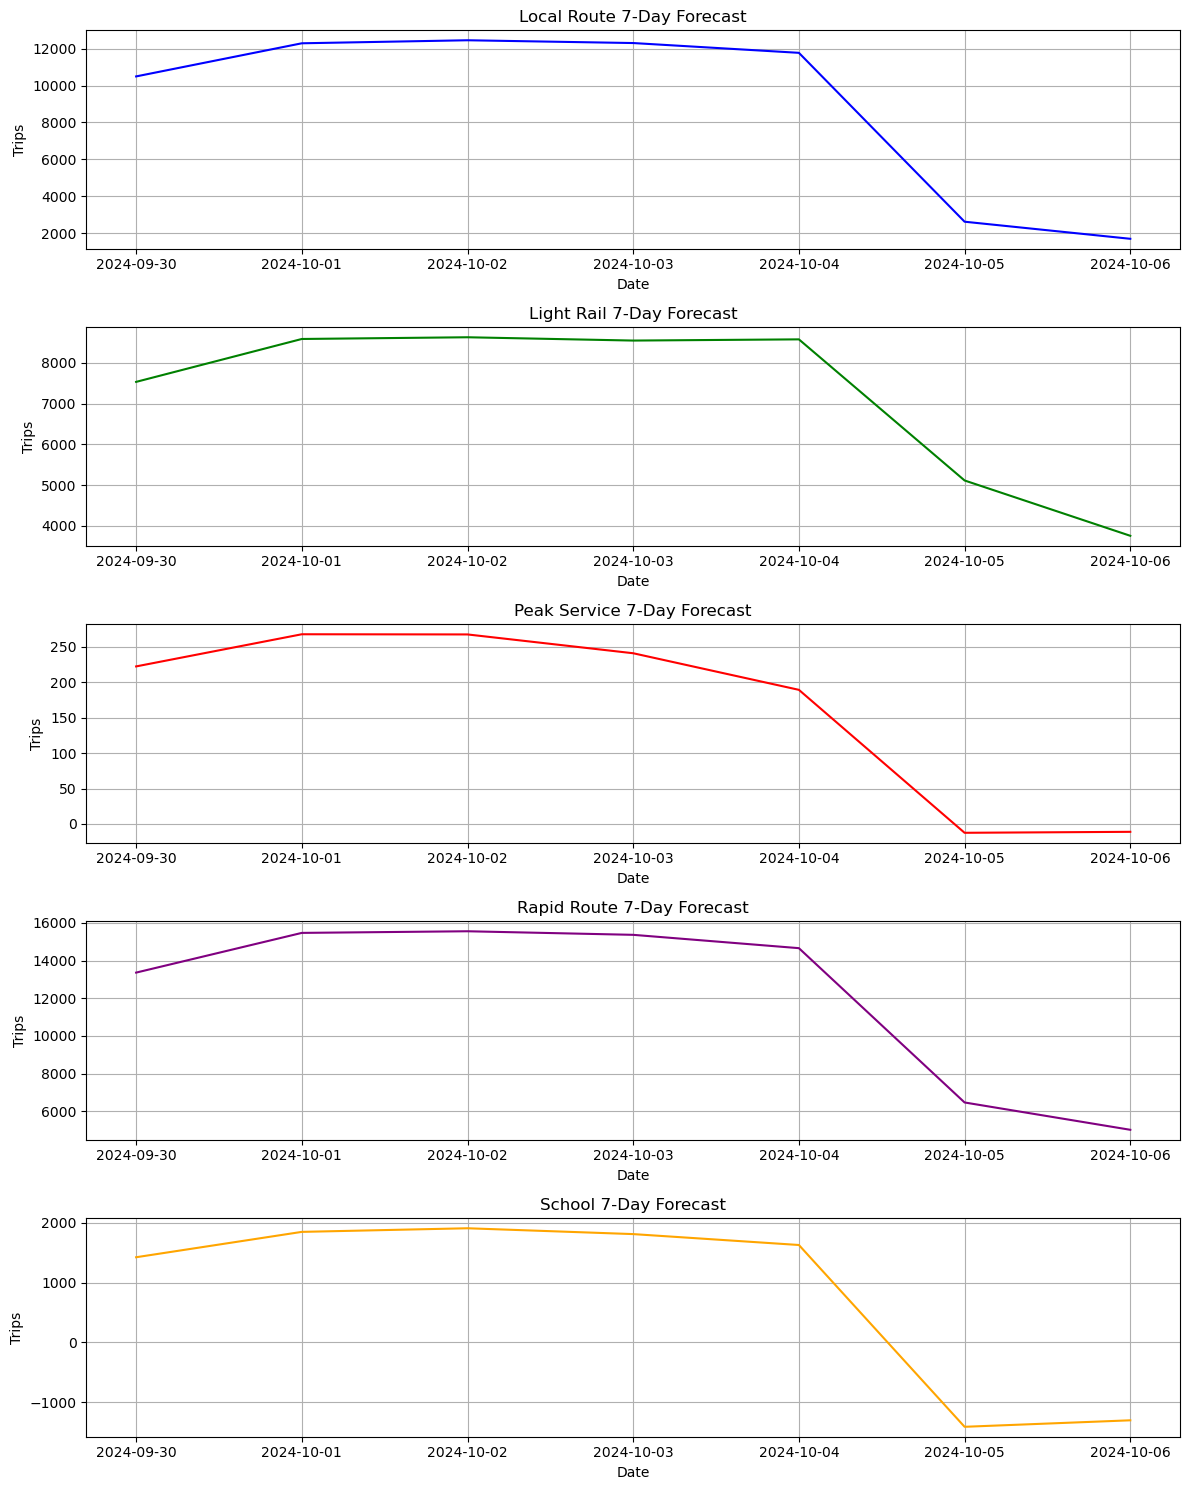

In [85]:

fig, axes = plt.subplots(5, 1, figsize=(12, 15))

metrics = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for ax, metric, color in zip(axes, metrics, colors):
    ax.plot(final_forecast['ds'], final_forecast[metric], color=color)
    ax.set_title(f'{metric} 7-Day Forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel('Trips')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [73]:
last_date = daily_transport.index.max()

In [74]:
last_date

Timestamp('2024-09-29 00:00:00')

In [106]:
pip install holidays